In [2]:
import pandas as pd#importing pandas module
#Reading csv folders
df_crashes=pd.read_csv("C:\\Users\\hp\\OneDrive\\codes\\python_data\\crashes.csv", low_memory=False)
df_vehicles=pd.read_csv("C:\\Users\\hp\\OneDrive\\codes\\python_data\\crashes_vehicles.csv",low_memory=False).drop('CRASH_DATE',axis=1)
#Merging dataframes on crash record id
df=pd.merge(df_crashes,df_vehicles,on='CRASH_RECORD_ID').reset_index()
#printing toatal no of reported crashes
print("Total Number of Reported Crashes:",df['CRASH_RECORD_ID'].nunique())


Total Number of Reported Crashes: 474262


In [3]:
#changing the CRASH_DATE column to date data type
df['CRASH_DATE']=pd.to_datetime(df['CRASH_DATE'])
#changing the CRASH_DATE column to date data type in df_crashes data frame
df_crashes['CRASH_DATE']=pd.to_datetime(df_crashes['CRASH_DATE'])
#Sorting the data frame to the years 2018,2019, and 2020
df=df[(df['CRASH_DATE']>='2018-01-01') & (df['CRASH_DATE']<='2020-12-31')]
df_crashes=df_crashes[(df_crashes['CRASH_DATE']>='2018-01-01') & (df_crashes['CRASH_DATE']<='2020-12-31')]


In [6]:
!pip install seaborn

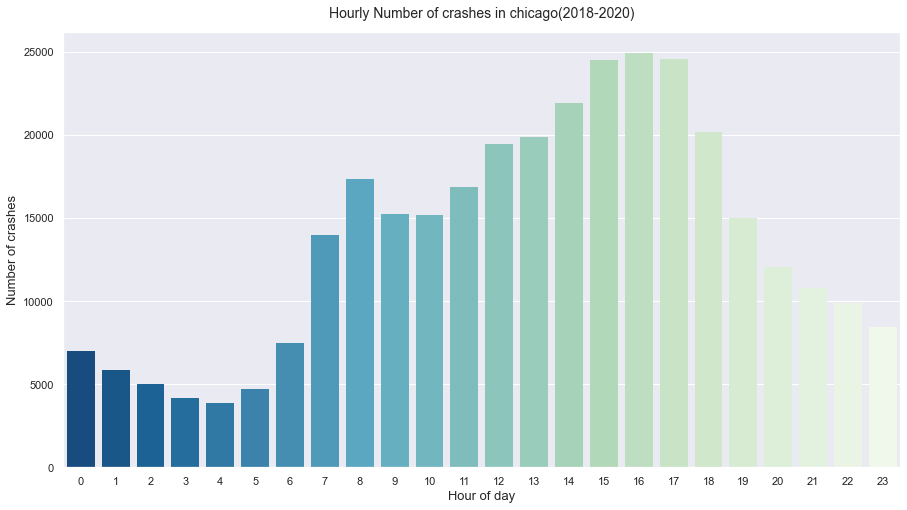

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
df['Hour']=df['CRASH_DATE'].dt.hour
plt.figure(figsize=(15,8))
s=sns.barplot(data=df.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(),x='Hour',y='CRASH_RECORD_ID',palette='GnBu_r',linewidth=0)
s.set_title('Hourly Number of crashes in chicago(2018-2020)',y=1.02,fontsize=14)
s.set_xlabel('Hour of day',fontsize=13)
s.set_ylabel('Number of crashes',fontsize=13)
plt.show()

In [6]:
df_daylight=df[df['LIGHTING_CONDITION']=='DAYLIGHT']
df_daylight['MAKE'].value_counts().nlargest(1)

CHEVROLET    49779
Name: MAKE, dtype: int64

In [7]:
df_crashes.groupby('FIRST_CRASH_TYPE')['WEATHER_CONDITION'].apply(lambda x: x.value_counts().head(1)).reset_index(name='COUNT').rename(columns={'level_1':'WEATHER'})

,FIRST_CRASH_TYPE,WEATHER,COUNT
0,ANGLE,CLEAR,27838
1,ANIMAL,CLEAR,208
2,FIXED OBJECT,CLEAR,12207
3,HEAD ON,CLEAR,2118
4,OTHER NONCOLLISION,CLEAR,825
5,OTHER OBJECT,CLEAR,2573
6,OVERTURNED,CLEAR,141
7,PARKED MOTOR VEHICLE,CLEAR,58069
8,PEDALCYCLIST,CLEAR,4517
9,PEDESTRIAN,CLEAR,6547


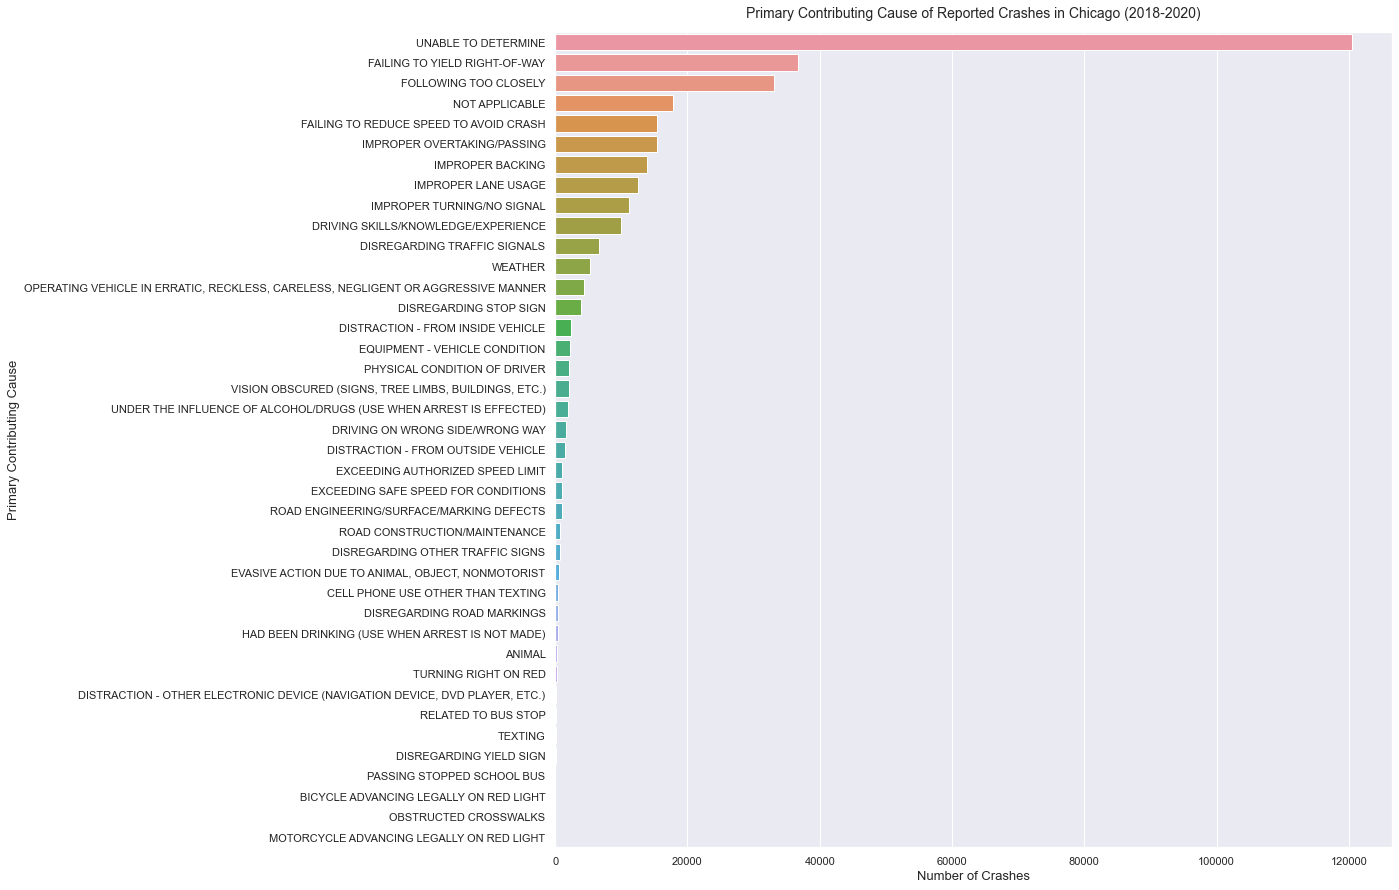

In [8]:
plt.figure(figsize=(15,15))
sns.countplot(data=df_crashes,y='PRIM_CONTRIBUTORY_CAUSE',order=df_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes in Chicago (2018-2020)',y=1.01,fontsize=14)
plt.xlabel('Number of Crashes',fontsize=13)
plt.ylabel('Primary Contributing Cause',fontsize=13)
plt.show()

In [9]:
df.groupby('LIC_PLATE_STATE')['VEHICLE_ID'].count().nlargest(10).reset_index(name='COUNT')

,LIC_PLATE_STATE,COUNT
0,IL,550630
1,XX,12128
2,IN,11914
3,WI,3793
4,MI,2554
5,FL,1802
6,TX,1739
7,OH,1516
8,AZ,1333
9,IA,1121


In [10]:
df_alcohol=df_crashes[(df_crashes['CRASH_DATE']>='2019-01-01') & (df_crashes['CRASH_DATE']<='2019-12-31')]
df_total=df_alcohol.groupby(df_alcohol['CRASH_DATE'].dt.strftime('%m'))['CRASH_RECORD_ID'].nunique()
df_alcohol=df_crashes[df_crashes['PRIM_CONTRIBUTORY_CAUSE'].str.contains('ALCOHOL|DRINKING')]
df_alcohol = df_alcohol.groupby(df_alcohol['CRASH_DATE'].dt.strftime('%m'))['CRASH_RECORD_ID'].nunique()
df_proportion = df_alcohol / df_total * 100
df_proportion.reset_index().rename(columns={'CRASH_DATE': 'MONTH', 'CRASH_RECORD_ID': 'PROPORTION'})


,MONTH,PROPORTION
0,01,2.062308
1,02,2.179710
2,03,2.113254
3,04,1.704606
4,05,1.830407
5,06,1.718662
6,07,2.111090
7,08,2.062374
8,09,2.313258
9,10,2.203884


In [11]:
print('Number of snowmobiles:', str(len(df[df['VEHICLE_TYPE'] == 'SNOWMOBILE'])))
print('Number of recreational off-highway vehicles:', str(len(df[df['VEHICLE_TYPE'] == 'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)'])))

Number of snowmobiles: 4
Number of recreational off-highway vehicles: 6
